# Football International Results analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
csv_file = '/content/results.csv'
df = pd.read_csv(csv_file)

In [13]:
# Show the 10 least recent international football matches
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [14]:
# Show the 10 most recent international football matches
df.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
42173,2021-06-08,Czech Republic,Albania,3,1,Friendly,Prague,Czech Republic,False
42174,2021-06-08,France,Bulgaria,3,0,Friendly,Paris,France,False
42175,2021-06-08,Gambia,Togo,1,0,Friendly,Antalya,Turkey,True
42176,2021-06-08,Hungary,Republic of Ireland,0,0,Friendly,Budapest,Hungary,False
42177,2021-06-08,Kosovo,Guinea,1,2,Friendly,Antalya,Turkey,True
42178,2021-06-08,Morocco,Ghana,1,0,Friendly,Rabat,Morocco,False
42179,2021-06-08,Mozambique,Eswatini,1,1,Friendly,Maputo,Mozambique,False
42180,2021-06-08,Poland,Iceland,2,2,Friendly,Poznan,Poland,False
42181,2021-06-08,Senegal,Cape Verde,2,0,Friendly,Thiès,Senegal,False
42182,2021-06-08,Spain,Lithuania,4,0,Friendly,Leganés,Spain,False


## Development over time (Games played & average goals scored)

In [15]:
df['year'] = pd.DatetimeIndex(df['date']).year
year = df['year'].value_counts().sort_index()
#print(year)

df['total_goals'] = df['home_score'] + df['away_score']
mean = df.groupby(['year']).mean()

In [16]:
mean

,home_score,away_score,neutral,total_goals
year,,,,
1872,0.000000,0.000000,0.000000,0.000000
1873,4.000000,2.000000,0.000000,6.000000
1874,2.000000,1.000000,0.000000,3.000000
1875,2.000000,2.000000,0.000000,4.000000
1876,3.500000,0.000000,0.000000,3.500000
...,...,...,...,...
2017,1.588727,1.107516,0.268267,2.696242
2018,1.543646,1.062983,0.329282,2.606630
2019,1.699567,1.173160,0.287446,2.872727


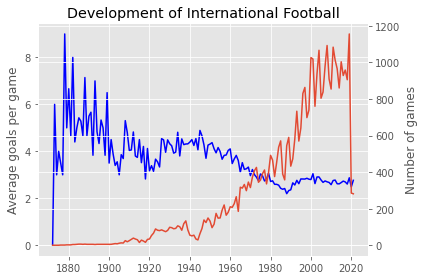

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(mean.index,
         mean['total_goals'],
         color = 'blue')
ax1.set_ylabel('Average goals per game')

ax2 = ax1.twinx()
ax2.plot(year)
ax2.set_ylabel('Number of games')

plt.title('Development of International Football')
plt.tight_layout()
plt.show()

## Is there advantage of playing at home?


In [18]:
non_neutral = df[df['neutral'] == False]

In [23]:
non_neutral[['home_score']].describe()


,home_score
count,31805.000000
mean,1.776607
std,1.725428
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,31.000000


In [24]:
non_neutral[['away_score']].describe()

,away_score
count,31805.000000
mean,1.117089
std,1.288182
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,15.000000


In [25]:
non_neutral['outcome'] = np.where(non_neutral['home_score'] >
                                  non_neutral['away_score'], 'Home',
                                  np.where(non_neutral['home_score'] ==
                                           non_neutral['away_score'],
                                           'Draw', 'Away'))
non_neutral['outcome'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Home    16044
Away     8400
Draw     7361
Name: outcome, dtype: int64

## What was the reason for these international games?

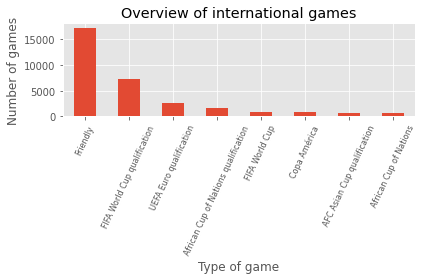

In [36]:
reason = df['tournament'].value_counts()
ax3 = reason[0:8].plot(kind = 'bar')
ax3.set_xlabel('Type of game')
ax3.set_ylabel('Number of games')
plt.title('Overview of international games')
plt.xticks(fontsize = 8, rotation = 65)
plt.tight_layout()
plt.show()

## Which country scored the most goals on one match? (At home vs away)


In [28]:
most_home_goals = df.iloc[non_neutral['home_score'].idxmax()]
most_home_goals

date                             2001-04-11
home_team                         Australia
away_team                    American Samoa
home_score                               31
away_score                                0
tournament     FIFA World Cup qualification
city                          Coffs Harbour
country                           Australia
neutral                               False
year                                   2001
total_goals                              31
Name: 23812, dtype: object

## How many countries have played international football games?


In [29]:
home = pd.unique(df['home_team'])
away = pd.unique(df['away_team'])
countries = pd.unique(np.concatenate((home, away)))
len(countries)

312

## Which country won the most games so far?


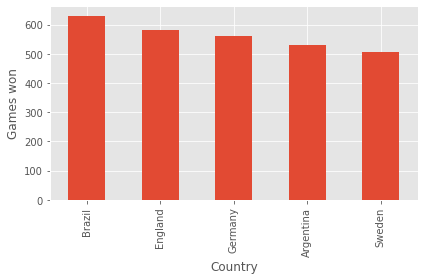

In [30]:
df['winner'] = np.where(df['home_score'] >
                        df['away_score'], df['home_team'],
                        np.where(df['home_score'] ==
                                 df['away_score'],
                                 'Draw', df['away_team']))

winners = df['winner'].value_counts()
ax4 = winners[1:6].plot(kind = 'bar')
ax4.set_xlabel('Country')
ax4.set_ylabel('Games won')
plt.tight_layout()
plt.show()

## Which country has scored the most goals? (Home + away)


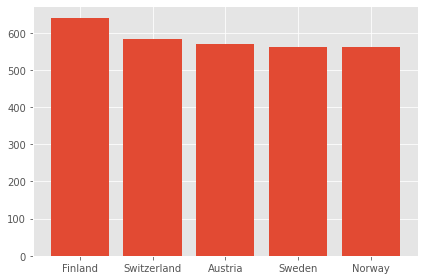

In [31]:
summary = pd.DataFrame(columns = ['Country', 'Goals scored',
                                  'Goals conceded'])
for country in countries:
    goals_scored = df.loc[df.home_team == country, 'home_score'].sum()
    + df.loc[df.away_team == country, 'away_score'].sum()

    goals_conceded = df.loc[df.home_team == country, 'away_score'].sum()
    + df.loc[df.away_team == country, 'home_score'].sum()

    summary = summary.append({'Country': country,
                              'Goals scoed': goals_scored,
                              'Goals conceded': goals_conceded},
                             ignore_index = True)
summary = summary.set_index('Country')
summary = summary.sort_values(by = ['Goals conceded'], ascending = False)
plt.bar(summary.index[0:5], summary['Goals conceded'][0:5])
plt.tight_layout()
plt.show()